In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# import plotly.graph_objects as go
# import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import time 
import os
%matplotlib inline

In [2]:
file_name = '.' + os.sep + 'data' + os.sep + 'greenhouse gas.csv'
df_greenhouse = pd.read_csv(file_name)
df_greenhouse

,year,CO2_levels,N2O_levels,CH4_levels
0,1984,0.3443,303.9,1654
1,1985,0.3458,304.5,1666
2,1986,0.3472,305.3,1679
3,1987,0.3490,305.9,1691
4,1988,0.3514,306.7,1703
5,1989,0.3530,307.6,1714
6,1990,0.3542,308.6,1724
7,1991,0.3555,309.3,1735
8,1992,0.3562,309.9,1743
9,1993,0.3570,310.1,1746


In [3]:
df_greenhouse.describe()

,year,CO2_levels,N2O_levels,CH4_levels
count,36.000000,36.000000,36.000000,36.000000
mean,2001.500000,0.374092,317.025000,1776.027778
std,10.535654,0.019652,8.344318,55.825486
min,1984.000000,0.344300,303.900000,1654.000000
25%,1992.750000,0.356800,310.050000,1745.250000
50%,2001.500000,0.371950,316.750000,1783.000000
75%,2010.250000,0.389475,323.550000,1810.250000
max,2019.000000,0.410500,332.000000,1877.000000


In [4]:
df_greenhouse.mean()

year          2001.500000
CO2_levels       0.374092
N2O_levels     317.025000
CH4_levels    1776.027778
dtype: float64

In [5]:
df_greenhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        36 non-null     int64  
 1   CO2_levels  36 non-null     float64
 2   N2O_levels  36 non-null     float64
 3   CH4_levels  36 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.2 KB


# CO2 Impact

CO2 levels indicate the amount of atmospheric CO2 measured in ppm for different time horizons (1985s-2020s) under different SRES emissions and socioeconomic scenarios.

first we will study the increase in CO2 and its effect on changes in the climate. It will lead us to the next study - an increase in CO2 has been proven experimentally to produce an increase in crop yield.

Text(0, 0.5, 'CO2_levels ppb')

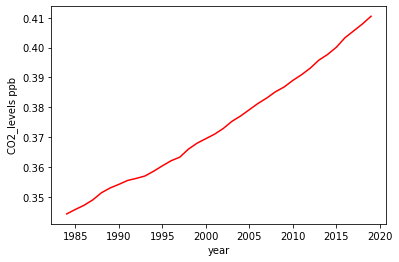

In [6]:
df_greenhouse.groupby('year').CO2_levels.mean().plot(kind='line',color='red')  #kind=line is used in order to obtain a line plot
plt.ylabel('CO2_levels ppb')

# N2O_levels

Text(0, 0.5, 'N2O_levels ppb')

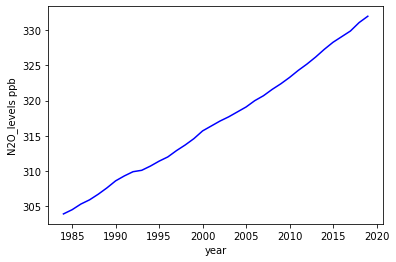

In [7]:
df_greenhouse.groupby('year').N2O_levels.mean().plot(kind='line',color='blue')  #kind=line is used in order to obtain a line plot
plt.ylabel('N2O_levels ppb')

# CH4 Impact

Text(0, 0.5, 'CH4_levels ppb')

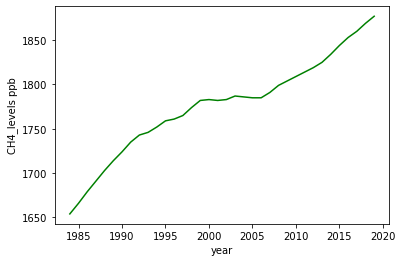

In [8]:
df_greenhouse.groupby('year').CH4_levels.mean().plot(kind='line',color='green')  #kind=line is used in order to obtain a line plot
plt.ylabel('CH4_levels ppb')

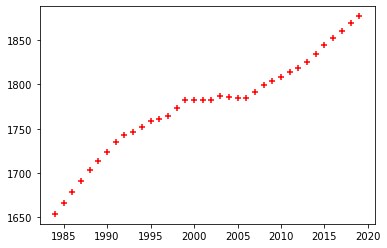

In [9]:
plt.scatter(df_greenhouse.year,df_greenhouse.CH4_levels,color='red',marker='+')

Text(0, 0.5, 'ppb')

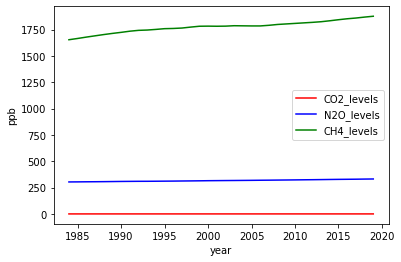

In [10]:
greenhouse=df_greenhouse.groupby(['year']).mean()[['CO2_levels','N2O_levels','CH4_levels']]
greenhouse.plot(color=['red','blue','green'])
plt.ylabel('ppb')

Text(0, 0.5, 'ppb')

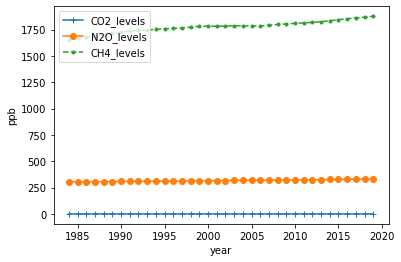

In [11]:
greenhouse=df_greenhouse.groupby(['year']).mean()[['CO2_levels','N2O_levels','CH4_levels']]
greenhouse.plot(style=['+-','o-','.--']).legend(loc='upper left', ncol=1)
plt.ylabel('ppb')

<AxesSubplot:>

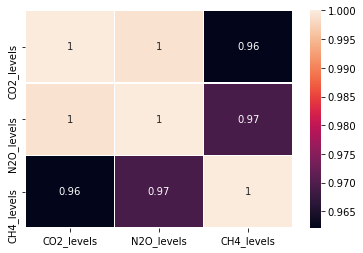

In [13]:
df_greenhouse2=df_greenhouse.copy()
df_greenhouse2=df_greenhouse2.drop(columns=['year'])
sns.heatmap(df_greenhouse2.corr(), annot=True,linewidth=0.5)

<AxesSubplot:xlabel='CO2_levels', ylabel='Density'>

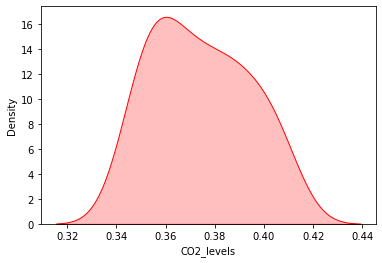

In [82]:
sns.kdeplot(df_greenhouse.CO2_levels, shade=True ,color='red')

<AxesSubplot:xlabel='N2O_levels', ylabel='Density'>

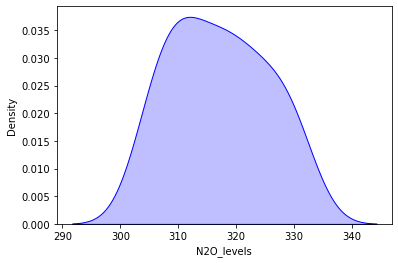

In [14]:
sns.kdeplot(df_greenhouse.N2O_levels, shade=True ,color='blue')

<AxesSubplot:xlabel='CH4_levels', ylabel='Density'>

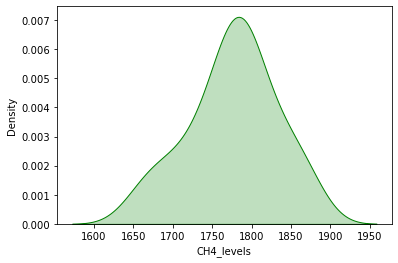

In [15]:
sns.kdeplot(df_greenhouse.CH4_levels, shade=True ,color='green')

Text(0.5, 0, 'N2O & CH4 levels')

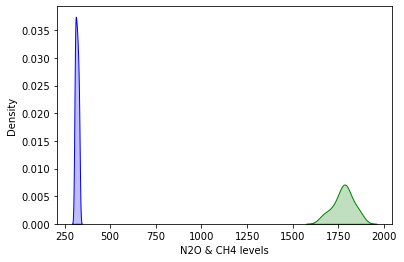

In [78]:
sns.kdeplot(df_greenhouse.N2O_levels, shade=True ,color='blue')
sns.kdeplot(df_greenhouse.CH4_levels, shade=True ,color='green')
plt.xlabel('N2O & CH4 levels')

Text(0.5, 0, 'CO2 & N2O & CH4 levels')

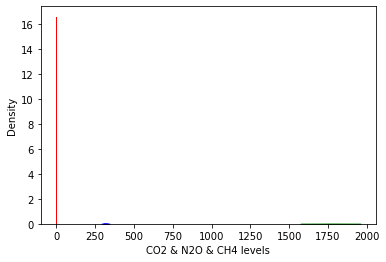

In [81]:
sns.kdeplot(df_greenhouse.N2O_levels, shade=True ,color='blue')
sns.kdeplot(df_greenhouse.CH4_levels, shade=True ,color='green')
ax = sns.kdeplot(df_greenhouse.CO2_levels, shade=True ,color='red')
# plt.ylabel('ppb')
plt.xlabel('CO2 & N2O & CH4 levels')